In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sta
import scipy.stats as stats
import pylab as pl

In [2]:
# Importing the dataset 
dataset = pd.read_csv('good_dataset.csv')
dataset

channel  region     fresh      milk   grocery    frozen  \
0          2       3  0.383041  1.652898  0.334978 -0.967004   
1          2       3 -0.305588  1.698756  0.733878 -0.059255   
2          1       3  0.456174 -0.866283 -0.328862  2.662821   
3          2       3 -0.016491  1.236906 -0.148989 -0.701951   
4          2       3  0.316411 -0.269838  0.218508 -0.811022   
5          2       3 -0.241535  0.253353  0.705655 -0.113790   
6          1       3 -0.439829 -0.136137  0.062883 -0.843274   
7          2       3 -0.434552  2.080802  2.584877 -0.412855   
8          2       3 -0.758497  0.386459  1.410835  1.487672   
9          2       3  0.441572 -0.887723 -0.268838 -0.259804   
10         2       3  2.719985  2.445875  1.168951 -0.924197   
11         2       3  1.431936  0.626168  1.809934  0.722418   
12         2       3  1.853555  1.596023  1.235335 -0.920092   
13         1       3  0.086582 -0.890700 -0.408364 -0.859693   
14         2       3 -1.046367  1.402767  1.241298 -1.013916   
15         2       3  1.110936  0.661603  0.839416  0.200521   
16         1       3 -0.216871 -0.479472  0.713207 -0.700192   
17         2       3  0.981480  0.123225 -0.253136 -0.467390   
18         1       3 -0.488421 -0.963060 -0.768308  0.891302   
19         2       3  0.812023  0.037168  0.341735 -0.974628   
20         1       3  0.043021 -0.936260 -0.599168  0.755257   
21         1       3  0.580230 -0.983309 -0.562597 -0.808089   
22         1       3  1.137195 -0.147453  1.039761 -0.419305   
23         1       3 -0.851018  0.069626 -0.545107  0.131912   
24         1       3  1.482859 -0.829954 -0.594199 -0.936511   
25         1       3  2.476413  0.202731  0.288270  2.502147   
26         1       3 -0.987222 -0.633125 -0.718222 -0.843274   
27         2       3 -1.087105  0.412663  1.036581 -0.604022   
28         2       3  0.689684  1.920896  1.312054  0.033397   
29         1       3  1.181492 -0.309740  0.015977  0.099660   
..       ...     ...       ...       ...       ...       ...   
302        1       3  0.007927 -1.050606 -0.981969 -0.153665   
303        1       3 -0.625974 -0.952638 -0.921746  1.004477   
304        1       3  2.084979  0.192905 -0.155946 -0.963486   
305        1       3  1.970494  2.054895 -0.252739 -1.018021   
306        1       3  1.046147  0.151216 -0.483294  1.443106   
307        1       3 -0.326816 -0.910949 -0.935858  0.120770   
308        2       3 -0.268162  2.602207  2.545524  0.581096   
309        2       3 -0.158340 -0.067053  0.105615 -0.127277   
310        1       3 -0.357615 -0.598285 -0.260888 -0.277983   
311        1       3 -1.159625 -0.148942  1.296750 -1.035027   
312        1       3 -0.439093 -0.629849 -0.488660  2.237680   
313        2       3 -0.209263  0.577929  0.531943 -0.100889   
314        2       3 -0.632969  2.035242  1.000209 -0.595226   
315        1       3 -0.550019  0.415045  1.029425 -0.879044   
316        2       3 -1.090541  1.306883  2.533400 -1.014503   
317        1       3 -0.084225 -0.095938 -0.725973 -0.721302   
318        1       3 -0.624747  0.345664  1.461120 -1.077834   
319        2       3  0.922213  0.220896  0.631519 -0.487914   
320        1       3  2.067923 -0.812386 -0.338601 -0.605781   
321        2       3  0.983812 -0.124822 -0.242205 -0.471495   
322        2       3  0.912028 -0.363638  1.263359 -0.579979   
323        1       3  0.440099  1.560886  1.677563  0.749393   
324        1       3 -0.797641  0.555298 -0.191920  0.196416   
325        1       3 -0.115393 -0.701315 -0.456263 -1.064933   
326        1       3 -0.791505  0.037168  2.108264 -0.755313   
327        1       3  1.419665 -0.876407 -0.222926 -0.934752   
328        1       3 -0.928323 -0.264181 -0.871064 -0.188850   
329        1       3  0.881474 -0.054547  0.421038 -0.689050   
330        1       3  0.091122 -0.632529 -0.724184 -0.483809   
331        1       3 -0.829544 -0.716800 -0.668931 -1.054378   

     detergents_paper  delicatessen 

In [3]:
dataset.shape

(332, 8)

# LOGISTIC REGRESSION

In [4]:
# Splitting the data into 70% training and 30% test subsets.
from sklearn.model_selection import train_test_split

X, y = dataset.iloc[:, 2:].values, dataset.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

In [5]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_
X_train_pca

array([[-0.73397239, -0.30897129,  0.30903715, -1.36895036,  0.27857744,
         0.57122786],
       [-0.43469476, -0.90947963, -0.55952441,  0.29602887, -0.74666102,
        -0.22794241],
       [ 3.35316281, -0.69715506,  0.09184542, -0.07094203, -0.00996216,
         0.23678026],
       ...,
       [-1.12837263, -0.93990511, -0.30754272,  0.04051181, -0.18290413,
         0.06950504],
       [-0.98450093, -0.17329857, -0.84887316, -1.12904111,  0.24047729,
        -0.01251326],
       [-0.53947894, -0.45242651, -0.74863298,  0.36402476, -0.15739362,
         0.07940924]])

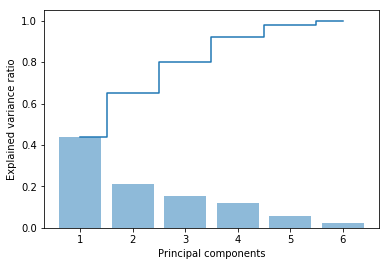

In [6]:
plt.bar(range(1, 7), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 7), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [7]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca

array([[-7.33972386e-01, -3.08971286e-01],
       [-4.34694760e-01, -9.09479628e-01],
       [ 3.35316281e+00, -6.97155059e-01],
       [-1.04160746e+00, -1.95794553e+00],
       [-9.46684670e-01, -7.13385763e-01],
       [-1.06371970e+00, -5.94914393e-01],
       [-1.09787575e+00, -1.90358658e+00],
       [-4.32929584e-01, -8.81190172e-02],
       [-1.44605782e+00, -1.05456181e-02],
       [-1.49484879e+00,  3.62232920e-02],
       [-1.00982937e+00, -6.79047092e-01],
       [-6.15257048e-01, -6.54176303e-01],
       [ 7.50769259e-01,  1.18600831e+00],
       [-6.29867319e-01, -1.10458191e+00],
       [ 2.57668713e+00, -6.64022615e-01],
       [-1.04706851e+00, -4.02376730e-01],
       [ 3.37573445e+00, -1.32152492e+00],
       [-2.20399560e+00,  8.42513094e-01],
       [-1.54180023e+00, -6.47622275e-01],
       [ 2.45163026e-01,  8.65999227e-01],
       [ 2.28775800e+00,  1.07752023e+00],
       [ 6.26873887e-02, -6.69473918e-01],
       [ 2.63826860e-01,  3.49734947e-01],
       [-1.

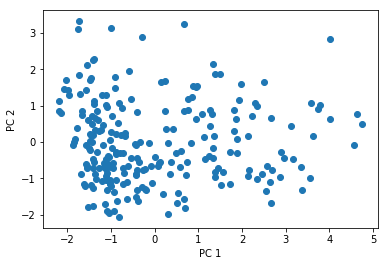

In [8]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [10]:
# Training logistic regression classifier using the first 2 principal components.
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
print(y_train.shape)
y_train

(232,)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


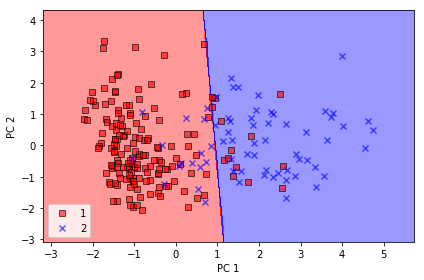

In [11]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


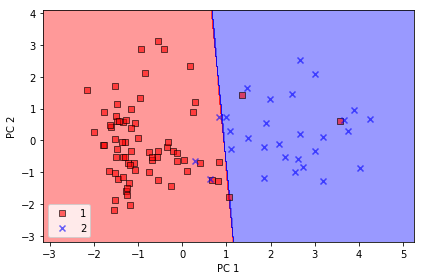

In [12]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# CLUSTERING

In [13]:
from sklearn.cluster import KMeans

# Importing dataset, slicing
X = dataset.iloc[:,2:].values

pca = PCA()
X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_
X_pca

array([[ 1.43981814e+00,  2.06108913e-01, -9.20097410e-01,
         2.07409648e-01,  1.07053320e+00, -1.42913843e-01],
       [ 1.87709649e+00,  4.92048368e-01,  9.30723786e-02,
        -4.54126403e-01,  8.45948293e-01,  1.45233230e-02],
       [-1.32262666e+00,  2.01986050e+00,  1.72117051e+00,
        -5.70073802e-01, -5.09869650e-01,  2.06803742e-01],
       ...,
       [ 2.69022598e-01,  1.21133367e-01, -8.42894351e-01,
         7.83694846e-01, -2.88860609e-01,  1.21991871e-01],
       [-7.78262560e-01,  5.71239402e-01, -9.84975896e-01,
        -1.28207690e+00, -1.27425748e-01, -4.36618592e-02],
       [-1.06269411e+00, -1.77469852e+00, -4.89044670e-01,
         1.46400361e-03,  9.37684572e-02,  8.59177906e-02]])

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[ 1.43981814e+00,  2.06108913e-01],
       [ 1.87709649e+00,  4.92048368e-01],
       [-1.32262666e+00,  2.01986050e+00],
       [ 7.76467877e-01,  1.11470797e-01],
       [ 2.39753651e-01, -5.67339447e-01],
       [ 1.33111914e+00,  8.94672944e-01],
       [ 4.76917612e-02, -8.74699449e-01],
       [ 4.26606558e+00,  4.50941043e-01],
       [ 1.96880110e+00,  6.84781888e-01],
       [-1.10129583e+00, -2.69482972e-01],
       [ 2.73365923e+00,  2.95527400e+00],
       [ 2.03145167e+00,  9.65875993e-01],
       [ 2.50692007e+00,  1.72093381e+00],
       [-9.49062206e-01, -8.59798082e-01],
       [ 2.37750615e+00, -9.82218274e-01],
       [ 1.42300630e+00,  2.42581068e+00],
       [ 2.99378562e-01, -8.80062891e-01],
       [ 2.55683396e-01,  1.19662568e+00],
       [-1.53507276e+00, -3.06797821e-01],
       [ 5.04306327e-01, -6.52694069e-01],
       [-1.42884750e+00,  1.75133756e-01],
       [-1.33337799e+00, -4.28668728e-01],
       [ 1.01494206e+00,  1.93206615e+00],
       [-4.

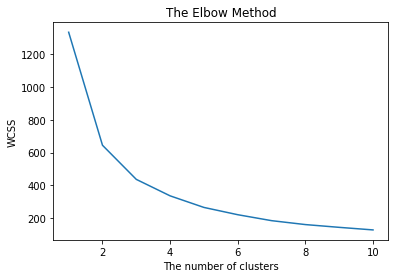

In [15]:
# Using the elbow method to find the optimal number of cluster
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("The number of clusters")
plt.ylabel("WCSS")
plt.show()


In [16]:
# Applying k-means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_pca)
y_kmeans

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

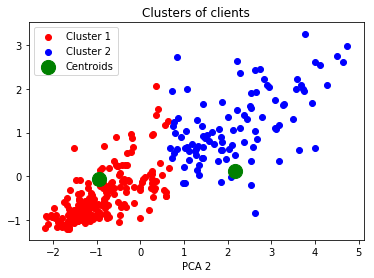

In [22]:
# Visualising the clusters
plt.scatter(X_pca[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'green', label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel('PCA 1')
plt.xlabel('PCA 2')
plt.legend()
plt.show()